In [1]:
import os
import time
import datetime as dt
import matplotlib.pyplot as plt
import tweepy
import requests
import pandas as pd
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
orig_working_directory = os.getcwd()
print(orig_working_directory)

os.chdir(os.path.join('..','..','..','..'))
print(os.getcwd())
from config import consumer_key, consumer_secret, access_token, access_token_secret

C:\Users\SeaLord\class\HW_test\02-Homework\06-Python-APIs\Twitter-API-Instructions
C:\Users\SeaLord\class


In [3]:
# Tweepy API Setup
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
from pygments import highlight, lexers, formatters

def ppj (json_obj):
    colormej = json.dumps(json_obj, sort_keys=True, indent=4)
    colorful_json = highlight(colormej, lexers.JsonLexer(), formatters.TerminalFormatter())
    print(colorful_json)

In [5]:
response_list = []
target_terms = ['SkyNews', 'BBCNews', 'CBSNews', 'CNN', 'Foxnews', 'NYtimes']

for tweeter_id in target_terms:
    tw_count = 0
    #This sets up the cursor and appends all responses to the tweets list
    tweets = []
    for tweet in tweepy.Cursor(api.user_timeline, tweeter_id, tweet_mode='extended').items(15):
        tweets.append(tweet)
        #ppj(tweet._json)
    
        #parse resposes and buildout a clean dict of content
        for twits in tweets:
            tw_count += 1
            responsedict = {'Source': tweeter_id,
                            'Text': twits.full_text,
                            'ID': twits.id,
                            'Time': twits.created_at,
                            'Count' : tw_count
                           }
            response_list.append(responsedict)
    #hold for tweets to load and prevent timeout trouble
    time.sleep(1)


len(response_list)

720

In [6]:
#This creates the dataframe that will be the basis for all analysis
mediaTwits_DF = pd.DataFrame(response_list)

#Sentiment Scores
for index, row in mediaTwits_DF.iterrows():
    mediaTwits_DF.loc[index, 'Compound'] = analyzer.polarity_scores(row['Text'])["compound"]
    mediaTwits_DF.loc[index, 'Positive'] = analyzer.polarity_scores(row['Text'])["pos"]
    mediaTwits_DF.loc[index, 'Neutral'] = analyzer.polarity_scores(row['Text'])["neu"]
    mediaTwits_DF.loc[index, 'Negative'] = analyzer.polarity_scores(row['Text'])["neg"]

#mediaTwits_DF.to_csv(orig_working_directory + '\mainstream_media_tweet_analysis.csv')

In [7]:
print_check = 5
print(f'\n SKY News: {len(mediaTwits_DF.loc[mediaTwits_DF["Source"] == "SkyNews"])} tweets\n{"--"*30}\n{mediaTwits_DF[["Text","Compound"]].loc[mediaTwits_DF["Source"] == "SkyNews"].tail(print_check)}\
    \n\n BBC News: {len(mediaTwits_DF.loc[mediaTwits_DF["Source"] == "BBCNews"])} tweets\n{"--"*30}\n{mediaTwits_DF[["Text","Compound"]].loc[mediaTwits_DF["Source"] == "BBCNews"].tail(print_check)}\
    \n\n CBS News: {len(mediaTwits_DF.loc[mediaTwits_DF["Source"] == "CBSNews"])} tweets\n{"--"*30}\n{mediaTwits_DF[["Text","Compound"]].loc[mediaTwits_DF["Source"] == "CBSNews"].tail(print_check)}\
    \n\n CNN: {len(mediaTwits_DF.loc[mediaTwits_DF["Source"] == "CNN"])} tweets\n{"--"*30}\n{mediaTwits_DF[["Text","Compound"]].loc[mediaTwits_DF["Source"] == "CNN"].tail(print_check)}\
    \n\n Fox News: {len(mediaTwits_DF.loc[mediaTwits_DF["Source"] == "Foxnews"])} tweets\n{"--"*30}\n{mediaTwits_DF[["Text","Compound"]].loc[mediaTwits_DF["Source"] == "Foxnews"].tail(print_check)}\
    \n\n NYtimes: {len(mediaTwits_DF.loc[mediaTwits_DF["Source"] == "NYtimes"])} tweets\n{"--"*30}\n{mediaTwits_DF[["Text","Compound"]].loc[mediaTwits_DF["Source"] == "NYtimes"].tail(print_check)}\
    ')


 SKY News: 120 tweets
------------------------------------------------------------
                                                  Text  Compound
115  Tui shares leap on news that Spain will welcom...    0.6369
116  A young girl has been pictured being pulled aw...   -0.5859
117  Coronavirus: Cheltenham Festival and Liverpool...    0.4939
118  Sir Richard Branson's Virgin Orbit rocket has ...   -0.5106
119  Hong Kong-born billionaire Stanley Ho - known ...   -0.5574    

 BBC News: 120 tweets
------------------------------------------------------------
                                                  Text  Compound
235  Scotland's "test and protect" scheme will star...    0.3818
236  Coronavirus deaths in the UK fall to six-week ...   -0.2732
237  UK supercar maker McLaren plans to cut more th...   -0.3818
238  RT @BBCPolitics: "Fair play to Douglas Ross," ...    0.5719
239  RT @BBCScotlandNews: "Time really is of the es...    0.3818    

 CBS News: 120 tweets
---------------------

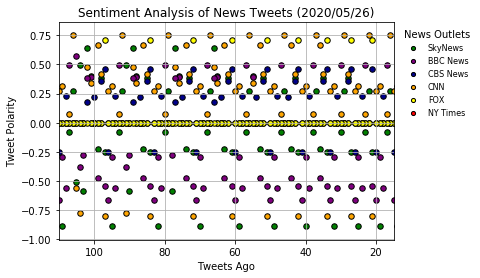

In [8]:
ax =  mediaTwits_DF[mediaTwits_DF["Source"] == 'SkyNews'].plot.scatter(x="Count", y="Compound", s=30, edgecolors='black', c='Green', label='SkyNews')
mediaTwits_DF[mediaTwits_DF["Source"] == 'BBCNews'].plot.scatter(x="Count", y="Compound", s=30, edgecolors='black', c='Purple', label='BBCNews', ax=ax)
mediaTwits_DF[mediaTwits_DF["Source"] == 'CBSNews'].plot.scatter(x="Count", y="Compound", s=30, edgecolors='black', c='Darkblue', label='CBSNews', ax=ax)
mediaTwits_DF[mediaTwits_DF["Source"] == 'CNN'].plot.scatter(x="Count", y="Compound", s=30, edgecolors='black', c='Orange', label='CNN', ax=ax)
mediaTwits_DF[mediaTwits_DF["Source"] == 'Foxnews'].plot.scatter(x="Count", y="Compound", s=30, edgecolors='black', c='Yellow', label='Foxnews', ax=ax)
mediaTwits_DF[mediaTwits_DF["Source"] == 'nytimes'].plot.scatter(x="Count", y="Compound", s=30, edgecolors='black', c='Red', label='nytimes', ax=ax)

plt.grid()
plt.xlabel("Tweets Ago")
plt.xlim(110,15)
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of News Tweets ({dt.datetime.now().strftime('%Y/%m/%d')})")
plt.legend(('SkyNews', 'BBC News', 'CBS News', 'CNN', 'FOX', 'NY Times'),scatterpoints=1,loc='upper right',bbox_to_anchor=(1.25, 1),ncol=1,\
           fontsize=8, markerscale=0.75,title='News Outlets',edgecolor='none',framealpha=1.00)

plt.show()
#plt.savefig(orig_working_directory + "\\tweet_sentiment_scatter_chart.png")

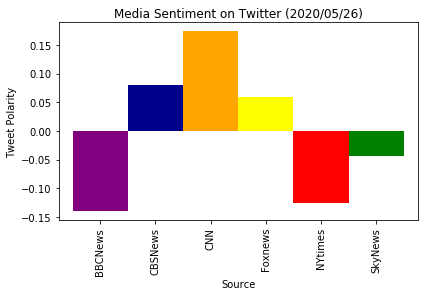

In [9]:
media_group_DF = mediaTwits_DF.groupby(['Source'])
media_group_DF = media_group_DF['Compound'].mean()
media_group_DF.plot.bar(width=1, color=['Purple', 'Darkblue', 'Orange', 'Yellow', 'Red', 'Green'])
plt.ylabel("Tweet Polarity")
plt.tight_layout()
plt.title(f"Media Sentiment on Twitter ({dt.datetime.now().strftime('%Y/%m/%d')})")
plt.show()
#plt.savefig(orig_working_directory + "\\compound_sentiment_bar_chart.png")

Trend Analysis:

1. Without much suprise, mainstreem news media is generally a place to find a negative outlook on the world. Foxnews evaluated as positive, but a review of tweet content showed only links i their text.
2. I was supprised to see CNN as more positive than others, but with covid news dominating the airwaves I suspect the other shoe to drop once politics dominate their feed, maybe I just caught them having a moment. NY Times does seem to intentially balance their reporting (extreme for extreme soemtimes, but balanced) so a mild negative can be explained over a limited set like this pull. 
2. BBC and CBS are both marked as deeply negative, I added SkyNews as a check to verify that wasn't just a missmatch related to British vs American speach and phrases, maybe I'll also add a christian and or other non-US news outlet for a wider perspective.
